In [1]:
# 04/25/2020 Francis Fan
import quandl
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import numpy as np
plt.style.use('seaborn')

import warnings 
warnings.filterwarnings("ignore")

## Also, I added __len__ internal function for the StockDate class

In [2]:
class StockData:
    # Initialize with array of ticker tuples, where first element is ticker name and second is quandl code
    def __init__(self, tickers, authtoken, start_date="2015-12-30", end_date="2016-12-30"):
        self.stocks = {}
        self.authtoken = authtoken
        self.start_date = start_date
        self.end_date = end_date
        for t in tickers:
            self.stocks[t[0]] = quandl.get(t[1], authtoken=authtoken, start_date="2015-12-30", end_date="2016-12-30")
    
    def close_prices(self, ticker):
        return stocks[ticker]["Close"]
    
    def volume(self, ticker):
        return stocks[ticker]["Volume"]
    
    def __iter__(self):
        return StockDataIterator(self)
    
    def __len__(self):              # new
         return len(self.stocks)    # new

In [3]:
class StockDataIterator:
    def __init__(self, StockData):
        self.StockData = StockData
        self.index = 0
        self.items = list(StockData.stocks.items())
        
    def __next__(self):
        if self.index < len(self.items):
            result = self.items[self.index]
            self.index += 1
            return result
        raise StopIteration
        
# Creating a StockData object
tickers = [('AAPL', 'WIKI/AAPL'),
           ('AMCX', 'WIKI/AMCX'),
           ('CELG', 'WIKI/CELG'),
           ('CVS', 'WIKI/CVS'),
           ('DAL', 'WIKI/DAL'),
           ('DFS', 'WIKI/DFS'),
           ('EA', 'WIKI/EA'),
           ('FL', 'WIKI/FL'),
           ('GM', 'WIKI/GM'),
           ('MHK', 'WIKI/MHK')
          ]

stocks = StockData(tickers, 'kMpwarf7xxv9RK6AaLd8')

## Also, to make the graphs more viewing friendly, I have changed the way Evan display the graphs in cell 4. I have put them all into one plot. I should be better if we are going to display the graphs in the representation. Also, the signal sizes and line width are smaller accordingly now. 

In [ ]:
fig1 = plt.figure(figsize=(18,12))   # new
row = 5                              # new
column = 2                           # new
count = 1                            # new

for ticker, stock in stocks:
    short_window = 10
    long_window = 20

    signals = pd.DataFrame(index=stock.index)
    signals["signal"] = 0.0

    signals["short_mavg"] = stock["Close"].rolling(window=short_window, min_periods=1, center=False).mean()
    
    
    signals["long_mavg"] = stock["Close"].rolling(window=long_window, min_periods=1, center=False).mean()

    signals["signal"][short_window:] = np.where(signals["short_mavg"][short_window:]
                                                > signals["long_mavg"][short_window:], 1.0, 0.0)

    signals["positions"] = signals["signal"].diff()
    

    ax1 = fig1.add_subplot(4, 3, count, ylabel="Price in $")  # adjusted 

    stock["Close"].plot(ax=ax1, color="black", lw=1.)

    signals[['short_mavg', "long_mavg"]].plot(ax=ax1, lw=1.)

    ax1.plot(signals.loc[signals.positions == 1.0].index,
             signals.short_mavg[signals.positions == 1.0],
            "^", markersize=10, color="g") # buy indicator

    ax1.plot(signals.loc[signals.positions == -1.0].index,
            signals.short_mavg[signals.positions == -1.0],
            "v", markersize=10, color="r") # sell indicator
    
    plt.title(ticker)
    
    count += 1    # new
fig1.show()       # new

In [ ]:
cap = float(1000000) # any number for starting capital

for ticker, stock in stocks:

    

## Also Evan mentioned about re-organizing the way we calculate portfolio. I think it would be the best if we can turn it into a new function so that we can call it when we need it instead of  hard coding it. In addition, because it will need to use signals, we might want to turn signals assignment into a function as well

In [4]:
def get_signals(stock, short_window=10, long_window=20):
    signals = pd.DataFrame(index=stock.index)
    signals["signal"] = 0.0

    signals["short_mavg"] = stock["Close"].rolling(window=short_window, min_periods=1, center=False).mean()
    
    
    signals["long_mavg"] = stock["Close"].rolling(window=long_window, min_periods=1, center=False).mean()

    signals["signal"][short_window:] = np.where(signals["short_mavg"][short_window:]
                                                > signals["long_mavg"][short_window:], 1.0, 0.0)

    signals["positions"] = signals["signal"].diff()
    
    return signals

In [ ]:
fig1 = plt.figure(figsize=(18,12))   # new
row = 5                              # new
column = 2                           # new
count = 1                            # new

for ticker, stock in stocks:
    short_window = 10
    long_window = 20

    signals = get_signals(stock)     # new
    

    ax1 = fig1.add_subplot(4, 3, count, ylabel="Price in $")  # adjusted 

    stock["Close"].plot(ax=ax1, color="black", lw=1.)

    signals[['short_mavg', "long_mavg"]].plot(ax=ax1, lw=1.)

    ax1.plot(signals.loc[signals.positions == 1.0].index,
             signals.short_mavg[signals.positions == 1.0],
            "^", markersize=10, color="g") # buy indicator

    ax1.plot(signals.loc[signals.positions == -1.0].index,
            signals.short_mavg[signals.positions == -1.0],
            "v", markersize=10, color="r") # sell indicator
    
    plt.title(ticker)
    
    count += 1    # new
fig1.show()       # new

## If we are fucntionalize everything, why not functionalize the way we make graphs on Stockdata. This way, it would be much cleaner when we glue all the code together in the end.

In [9]:
def overview_stockdata(stock, ticker, signals, figure):
    ax1 = figure.add_subplot(4, 3, count, ylabel="Price in $")  # adjusted 

    stock["Close"].plot(ax=ax1, color="black", lw=1.)

    signals[['short_mavg', "long_mavg"]].plot(ax=ax1, lw=1.)

    ax1.plot(signals.loc[signals.positions == 1.0].index,
             signals.short_mavg[signals.positions == 1.0],
            "^", markersize=10, color="g") # buy indicator

    ax1.plot(signals.loc[signals.positions == -1.0].index,
            signals.short_mavg[signals.positions == -1.0],
            "v", markersize=10, color="r") # sell indicator
    
    plt.title(ticker)
    return figure

In [ ]:
fig1 = plt.figure(figsize=(18,12))   # new
row = 5                              # new
column = 2                           # new
count = 1                            # new

for ticker, stock in stocks:
    short_window = 10
    long_window = 20

    signals = get_signals(stock)     # new
    
    fig1 = overview_stockdata(stock, signals, fig1)
    
    count += 1    # new
fig1.show()       # new

## Alright, back to portfolio

In [6]:
def cal_portfolio(stock):    # we assume that stocks is a global variable
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    # print(positions, "\n")
    positions["Position in STOCK"] = 1000*signals['signal'] # buy 1000 shares
    # make sure not to buy too many shares with how much capital you have

    #portfolio starts with value owned
    portfolio = positions.multiply(stock['Close'], axis=0)
    
    #difference goes in shares owned
    pos_diff = positions.diff()
    
    # add holdings to portfolio 
    portfolio["holdings"] = (positions.multiply(stock["Close"], axis=0)).sum(axis=1)

    # add cash to porfolio
    portfolio["cash"] = cap - (pos_diff.multiply(stock["Close"], axis=0)).sum(axis=1).cumsum()

    portfolio["total"] = portfolio["cash"] + portfolio["holdings"]

    portfolio["returns"] = portfolio["total"].pct_change()

    del portfolio["Position in STOCK"]
    return portfolio

In [ ]:
cap = float(1000000) # any number for starting capital
portfolioes = []
for _, stock in stocks:
    portfolio = cal_portfolio(stock)
    portfolioes.append(portfolio)

## This way, we have all the portfolioes in the order of tickers' order. Let's take a look at the code where everything is glued together. It would be much easier

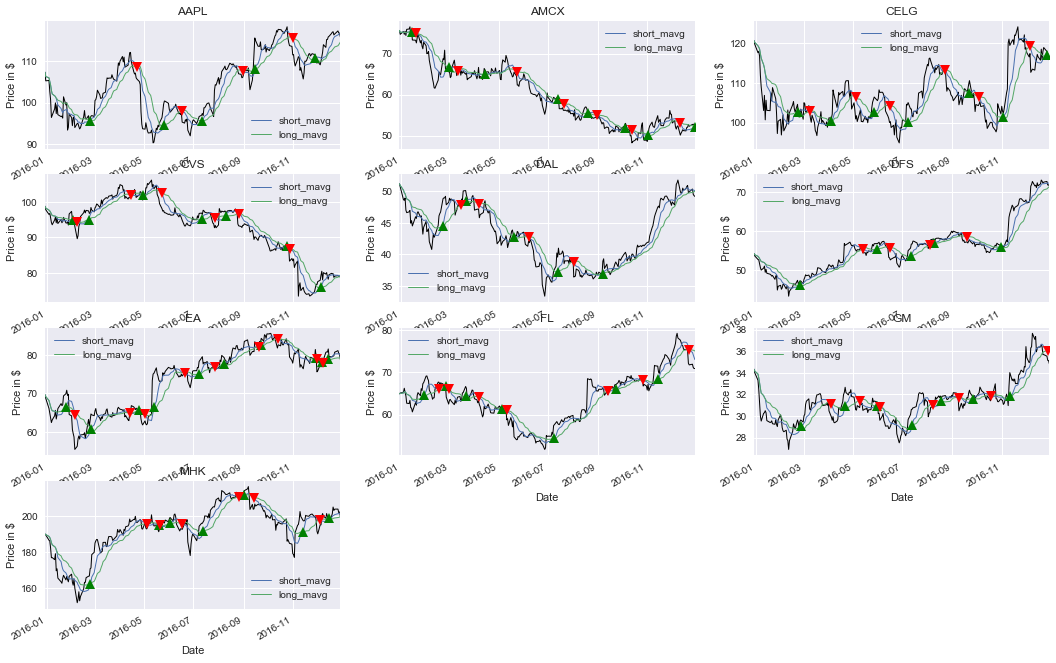

In [10]:
fig1 = plt.figure(figsize=(18,12))   # new
row = 5                              # new
column = 2                           # new
count = 1                            # new

cap = float(1000000) # any number for starting capital
portfolioes = []

for ticker, stock in stocks:
    short_window = 10
    long_window = 20
    
    # calculate signals
    signals = get_signals(stock)     # new
    
    # adding signals graphes
    fig1 = overview_stockdata(stock, ticker, signals, fig1)
    
    count += 1    # new

    # calculating portfolio
    # I dont want this part here because we should should the fig1 before calculating protfolio. 
    # But let's bear with it for now because I dont want to waste another for loop
    portfolio = cal_portfolio(stock)
    portfolioes.append(portfolio)
    
fig1.show()       # new

In [13]:
portfolioes[0].tail(5)

,holdings,cash,total,returns
Date,,,,
2016-12-23,116520.0,898430.0,1014950.0,0.000227
2016-12-27,117260.0,898430.0,1015690.0,0.000729
2016-12-28,116760.0,898430.0,1015190.0,-0.000492
2016-12-29,116730.0,898430.0,1015160.0,-0.000030
2016-12-30,115820.0,898430.0,1014250.0,-0.000896


## One last thing, right now, the way we calculate these signals points are based on the last ten or twenty days' stock values only. My concern is that, this might not be sufficient to fit the topic of "artificial intelligent". It is way too easy. I know everyone is busy right now and I dont want more work to us. Just a suggestion we might take into consideration. 